In [2]:
# Importing the relevant libraries

import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_columns', None)

RSEED = 42
# Modeling Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # pip install plotly needs to executed
import plotly.graph_objects as go
# import Pywaffle lib
from pywaffle import Waffle 

In [3]:
df = pd.read_csv('../data/Flu_Shot_Data_cleaned_2.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head(2)

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


### Investigating on demographic data for sample description

Attributes to be potentially considered for sample description
- age
- gender
- race 
- employment status 
- income poverty 
- education
- employment status 

### Library used: PyWaffle 
- pip install pywaffle 
- documentation can be found here: https://pywaffle.readthedocs.io/en/latest/
- Icons from font awesome can be used: https://fontawesome.com/v5.15/icons

### Plotting distribution of gender

In [6]:
df_gender = df.groupby('sex').size().reset_index(name='percentage')
df_gender.percentage = (df_gender['percentage'] / df_gender['percentage'].sum()*100).round()
df_gender

,sex,percentage
0,Female,59.0
1,Male,41.0


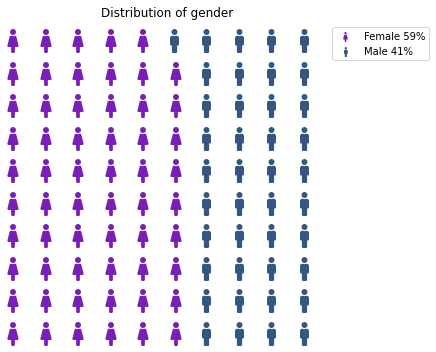

In [29]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=df_gender['percentage'],
    colors=["#781fb8", "#335780"],
    icons=['female', 'male'],
    font_size=24,
    icon_style='solid',
    icon_legend=True,
    legend={
        'labels': ['Female 59%', 'Male 41%'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    },
    title={'label': 'Distribution of gender','loc': 'center','fontdict': {'fontsize': 12}},

    figsize=(10, 5)
)
plt.savefig('../images/info_gender.jpg')

### Plotting distribution of age 

In [20]:
df_age = df.groupby('age_group').size().reset_index(name='percentage')
df_age.percentage = (df_age['percentage'] / df_age['percentage'].sum()*100).round()
df_age

,age_group,percentage
0,18 - 34 Years,20.0
1,35 - 44 Years,14.0
2,45 - 54 Years,20.0
3,55 - 64 Years,21.0
4,65+ Years,26.0


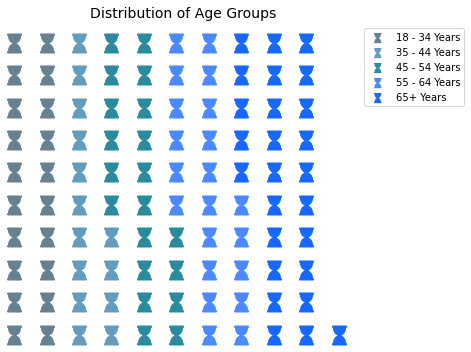

In [53]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=df_age['percentage'],
    colors=["#668191", "#649cbd", "#2b8b9e", "#4a89ff", "#1768ff"],
    icons=['hourglass', 'hourglass', 'hourglass', 'hourglass','hourglass'],
    font_size=20,
    icon_style='solid',
    icon_legend=True,
    rounding_rule='floor',
    legend={
        'labels': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    },
    title={'label': 'Distribution of Age Groups','loc': 'center','fontdict': {'fontsize': 14}},

    figsize=(10, 5)
)

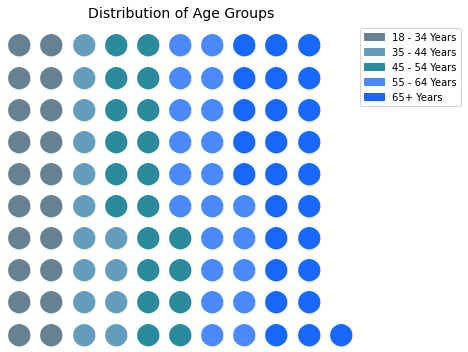

In [30]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=df_age['percentage'],
    colors=["#668191", "#649cbd", "#2b8b9e", "#4a89ff", "#1768ff"],
    characters='⬤',
    font_size=22,
    icon_style='solid',
    icon_legend=True,
    rounding_rule='floor',
    legend={
        'labels': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    },
    title={'label': 'Distribution of Age Groups','loc': 'center','fontdict': {'fontsize': 14}},

    figsize=(10, 5)
)
plt.savefig('../images/info_ages.jpg')

### Plotting distribution of race

In [23]:
df_race = df.groupby('race').size().reset_index(name='percentage')
df_race.percentage = (df_race['percentage'] / df_race['percentage'].sum()*100).round()
df_race

,race,percentage
0,Black,8.0
1,Hispanic,7.0
2,Other or Multiple,6.0
3,White,79.0


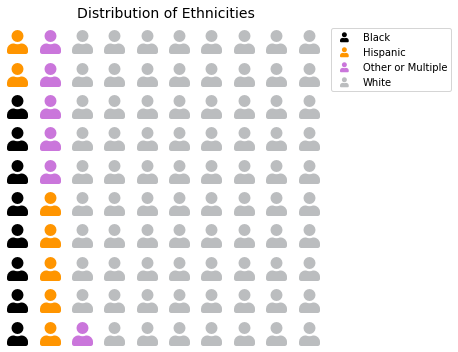

In [51]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=df_race['percentage'],
    colors=["#000000", "#ff9500", "#ca76db", "#bbbdbf"],
    icons=['user', 'user', 'user', 'user'],
    font_size=24,
    icon_style='solid',
    icon_legend=True,
    rounding_rule='floor',
    legend={
        'labels': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    },
    title={'label': 'Distribution of Ethnicities','loc': 'center','fontdict': {'fontsize': 14}},

    figsize=(10, 5)
)
plt.savefig('../images/info_race.jpg')

### Distribution of Poverty

In [25]:
df_pov = df.groupby('income_poverty').size().reset_index(name='percentage')
df_pov.percentage = (df_pov['percentage'] / df_pov['percentage'].sum()*100).round()
df_pov

,income_poverty,percentage
0,"<= $75,000, Above Poverty",57.0
1,"> $75,000",31.0
2,Below Poverty,12.0


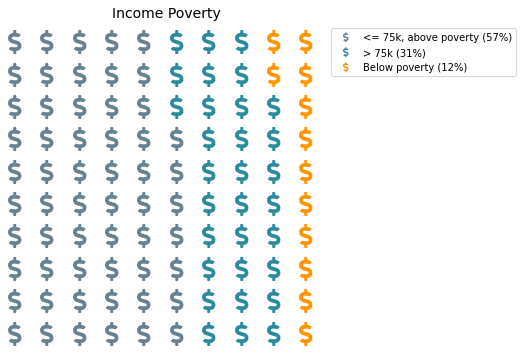

In [32]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=df_pov['percentage'],
    colors=["#668191", "#2b8b9e", "#ff9500"],
    icons=['dollar-sign', 'dollar-sign', 'dollar-sign'],
    font_size=24,
    icon_style='solid',
    icon_legend=True,
    rounding_rule='floor',
    legend={
        'labels': ['<= 75k, above poverty (57%)', '> 75k (31%)', 'Below poverty (12%)'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    },
    title={'label': 'Income Poverty','loc': 'center','fontdict': {'fontsize': 14}},

    figsize=(10, 5)
)

plt.savefig('../images/info_poverty.jpg')

### Employment

In [27]:
df_work = df.groupby('employment_status').size().reset_index(name='percentage')
df_work.percentage = (df_work['percentage'] / df_work['percentage'].sum()*100).round()
df_work

,employment_status,percentage
0,Employed,54.0
1,Not in Labor Force,41.0
2,Unemployed,6.0


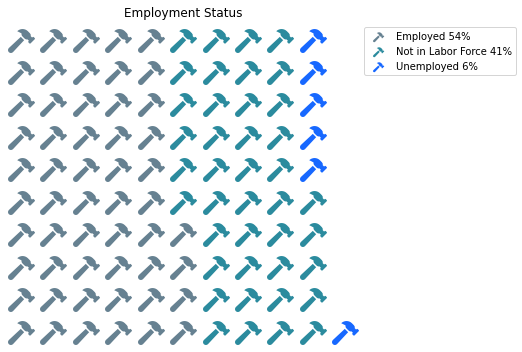

In [33]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=df_work['percentage'],
    colors=["#668191", "#2b8b9e", "#1768ff"],
    icons=['hammer', 'hammer', 'hammer'],
    font_size=24,
    icon_style='solid',
    icon_legend=True,
    legend={
        'labels': ['Employed 54%', 'Not in Labor Force 41%', 'Unemployed 6%'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    },
    title={'label': 'Employment Status','loc': 'center','fontdict': {'fontsize': 12}},

    figsize=(10, 5)
)

plt.savefig('../images/info_employ.jpg')

### Plotting education

In [34]:
df_edu = df.groupby('education').size().reset_index(name='percentage')
df_edu.percentage = (df_edu['percentage'] / df_edu['percentage'].sum()*100).round()
df_edu

,education,percentage
0,12 Years,23.0
1,< 12 Years,9.0
2,College Graduate,40.0
3,Some College,28.0


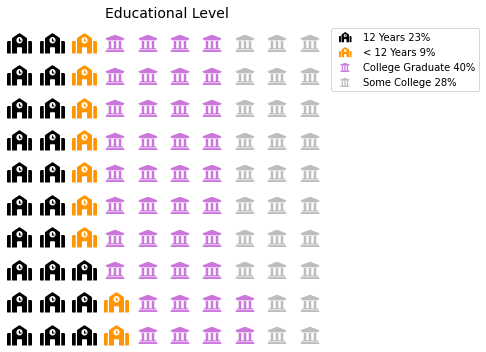

In [50]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=df_edu['percentage'],
    colors=["#000000", "#ff9500", "#ca76db", "#bbbdbf"],
    icons=['school', 'school', 'university', 'university'],
    font_size=20,
    icon_style='solid',
    icon_legend=True,
    rounding_rule='floor',
    legend={
        'labels': ['12 Years 23%', '< 12 Years 9%', 'College Graduate 40%', 'Some College 28%'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    },
    title={'label': 'Educational Level','loc': 'center','fontdict': {'fontsize': 14}},

    figsize=(10, 5)
)
plt.savefig('../images/info_education.jpg')

In [17]:
## the following code does not work!!

df_gender = df.groupby('gender').size().reset_index(name='counts')
n_categories = df_gender.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['gender', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
            'icons': {{'female': 'female', 'male': 'male'}, loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

SyntaxError: invalid syntax (2876208206.py, line 15)